<a href="https://colab.research.google.com/github/i-amAkashhhh/Machine-Learning-NIDS/blob/main/2_NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import RFE
import itertools
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_train = pd.read_csv("/content/KDDTrain+.txt")
data_test = pd.read_csv("/content/KDDTest+.txt")

In [ ]:
# pip install catboost

In [ ]:
data_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
print(data_test.shape)
print(data_train.shape)

(22543, 43)
(125972, 43)


In [ ]:
# columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
# ,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
# ,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
# ,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
# ,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_srac_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
# ,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [ ]:
data_train.info

<bound method DataFrame.info of         0  tcp  ftp_data   SF   491   0.1  0.2  0.3  0.4  0.5  ...  0.17  \
0       0  udp     other   SF   146     0    0    0    0    0  ...  0.00   
1       0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
2       0  tcp      http   SF   232  8153    0    0    0    0  ...  1.00   
3       0  tcp      http   SF   199   420    0    0    0    0  ...  1.00   
4       0  tcp   private  REJ     0     0    0    0    0    0  ...  0.07   
...    ..  ...       ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
125967  0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
125968  8  udp   private   SF   105   145    0    0    0    0  ...  0.96   
125969  0  tcp      smtp   SF  2231   384    0    0    0    0  ...  0.12   
125970  0  tcp    klogin   S0     0     0    0    0    0    0  ...  0.03   
125971  0  tcp  ftp_data   SF   151     0    0    0    0    0  ...  0.30   

        0.03  0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0       0.60    0.88    0.00    0.00    0.00  0.00    0.00   normal  15  
1       0.05    0.00    0.00    1.00    1.00  0.00    0.00  neptune  19  
2       0.00    0.03    0.04    0.03    0.01  0.00    0.01   normal  21  
3       0.00    0.00    0.00    0.00    0.00  0.00    0.00   normal  21  
4       0.07    0.00    0.00    0.00    0.00  1.00    1.00  neptune  21  
...      ...     ...     ...     ...     ...   ...     ...      ...  ..  
125967  0.06    0.00    0.00    1.00    1.00  0.00    0.00  neptune  20  
125968  0.01    0.01    0.00    0.00    0.00  0.00    0.00   normal  21  
125969  0.06    0.00    0.00    0.72    0.00  0.01    0.00   normal  18  
125970  0.05    0.00    0.00    1.00    1.00  0.00    0.00  neptune  20  
125971  0.03    0.30    0.00    0.00    0.00  0.00    0.00   normal  21  

[125972 rows x 43 columns]>

In [ ]:
# data_train.columns = columns

In [ ]:
data_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
data_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
data_train.head(5)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
new_var = data_train.describe().T
new_var

,count,mean,std,min,25%,50%,75%,max
0,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
491,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
0.1,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
0.2,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
0.3,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
0.4,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
0.5,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
0.6,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
0.7,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
0.8,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [ ]:
import pandas as pd

def data_preprocess(df):
    data_profile = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtype
        nunique = df[col].nunique()
        null = df[col].isnull().sum()  # Indented correctly
        dup = df[col].duplicated().sum()  # Indented correctly
        data_profile.append([col, dtype, nunique, null, dup])

    data_profile = pd.DataFrame(data_profile, columns=['column', 'dtype', 'nunique', 'null', 'dup'])
    return data_profile  # Return the correct variable


In [ ]:
data_preprocess(data_train)

,column,dtype,nunique,null,dup
0,0,int64,2981,0,122991
1,tcp,object,3,0,125969
2,ftp_data,object,70,0,125902
3,SF,object,11,0,125961
4,491,int64,3341,0,122631
5,0.1,int64,9326,0,116646
6,0.2,int64,2,0,125970
7,0.3,int64,3,0,125969
8,0.4,int64,4,0,125968
9,0.5,int64,28,0,125944


In [ ]:
data_train.isnull().sum()

,0
0,0
tcp,0
ftp_data,0
SF,0
491,0
0.1,0
0.2,0
0.3,0
0.4,0
0.5,0


In [ ]:
for i in data_train.columns:
    print(i,data_train[i].unique())

0 [    0  5607   507 ...  5430 11680   679]
tcp ['udp' 'tcp' 'icmp']
ftp_data ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
SF ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
491 [  146     0   232 ...  2816 11466  2358]
0.1 [    0  8153   420 ...  5424 17655 52866]
0.2 [0 1]
0.3 [0 3 1]
0.4 [0 1 3 2]
0.5 [ 0  5  6  4  2  1 28 30 22 24 14  3 15 25 19 18 77 17 11  7 20 12  9 10
  8 21 33 44]
0.6 [0 2 1 3 

In [ ]:
data_train.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03',
       '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

# **EDA**


In [ ]:
# sns.countplot(data=data_train, x='normal', palette='PRGn')

<Axes: xlabel='tcp', ylabel='count'>

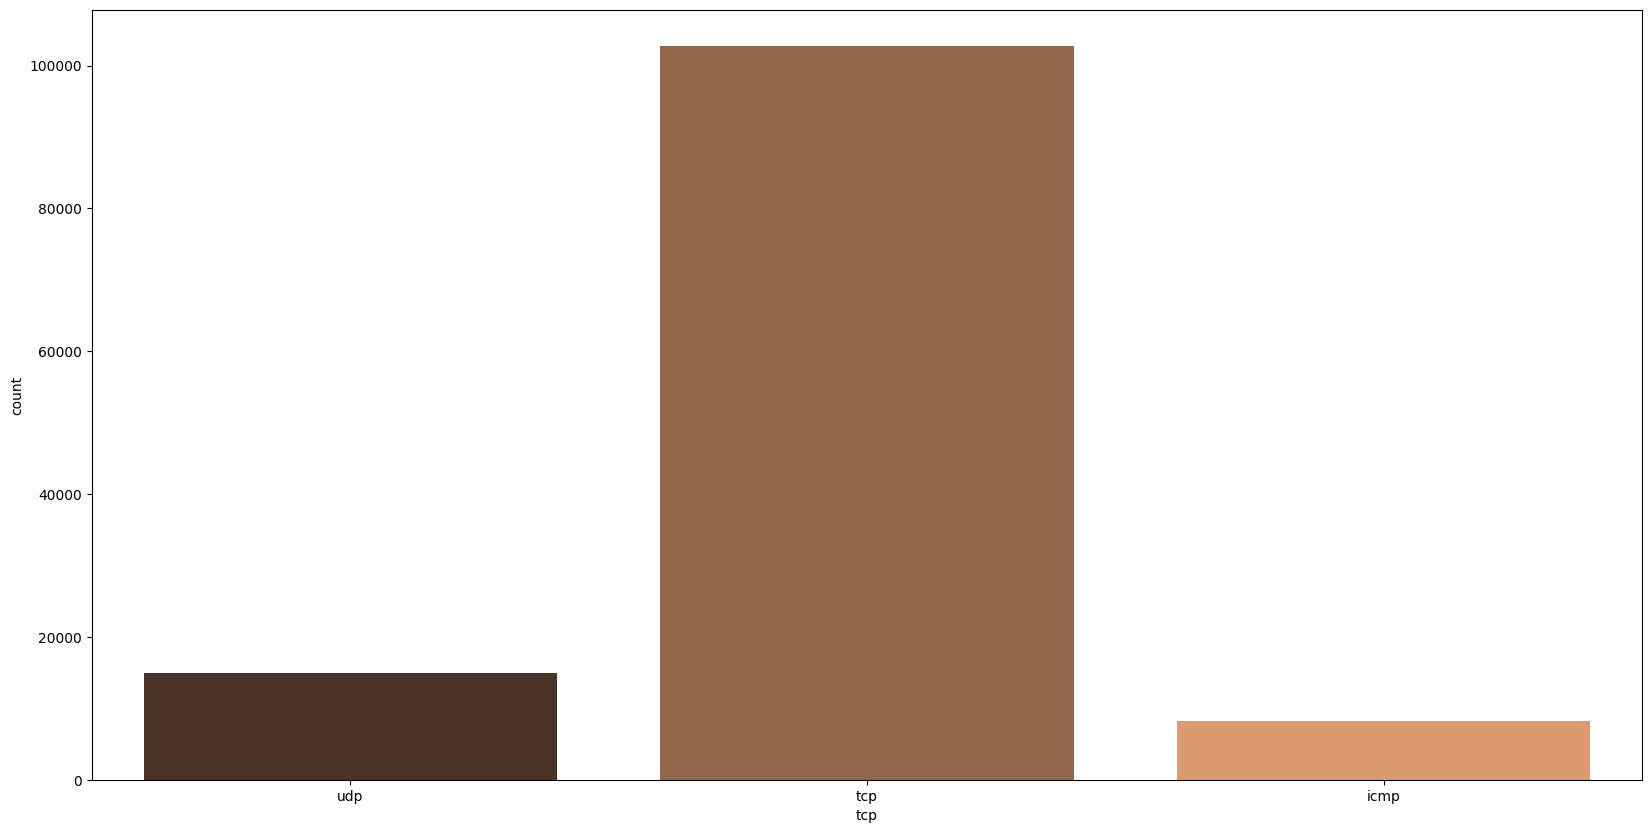

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data_train, x='tcp', palette='copper')

<Axes: xlabel='tcp', ylabel='count'>

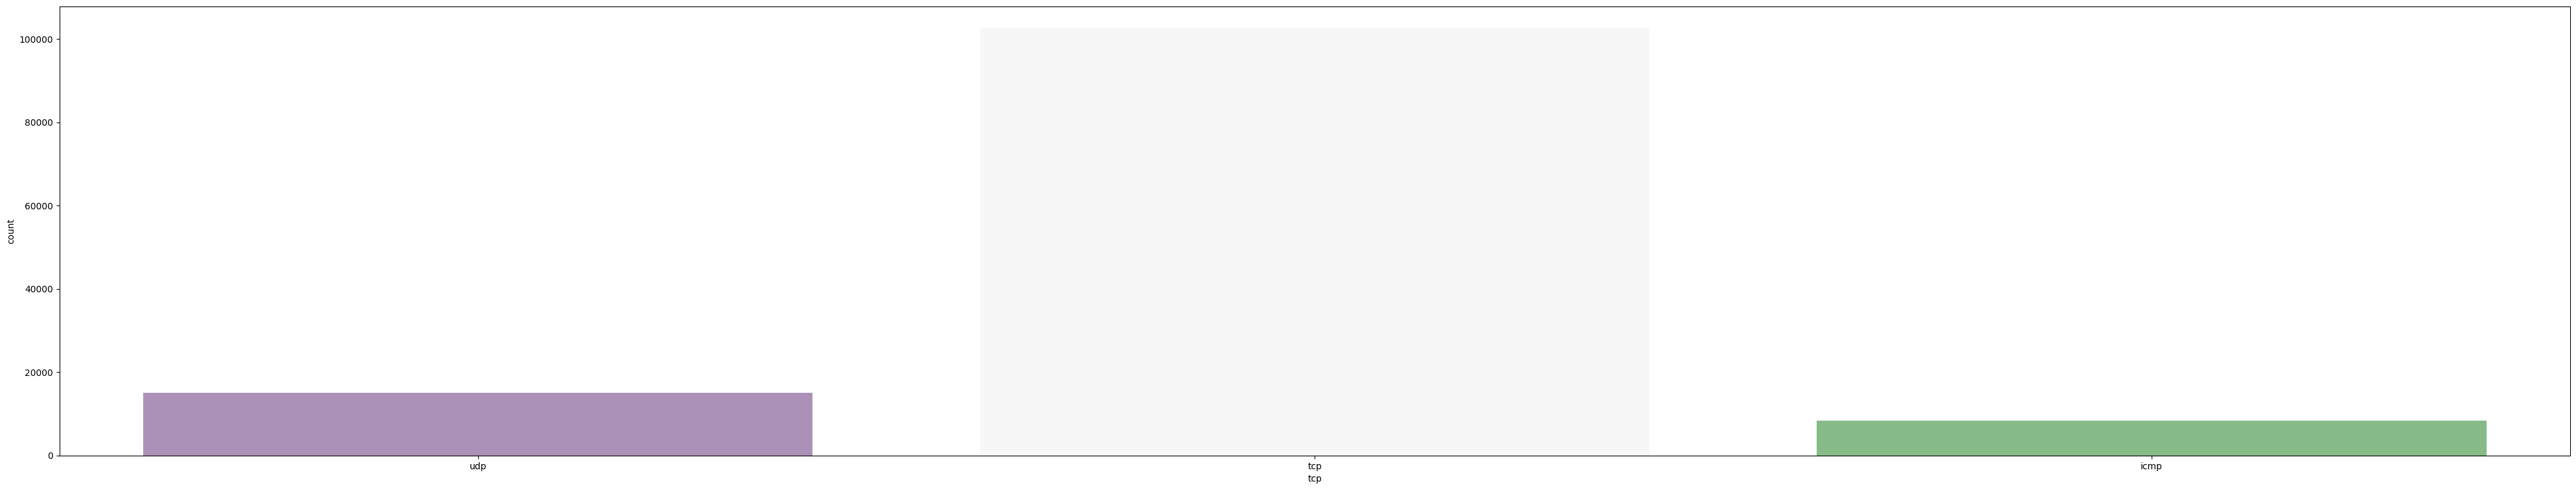

In [ ]:
plt.figure(figsize=(50,9))
sns.countplot(data=data_train, x='tcp', palette='PRGn')

<Axes: xlabel='ftp_data', ylabel='count'>

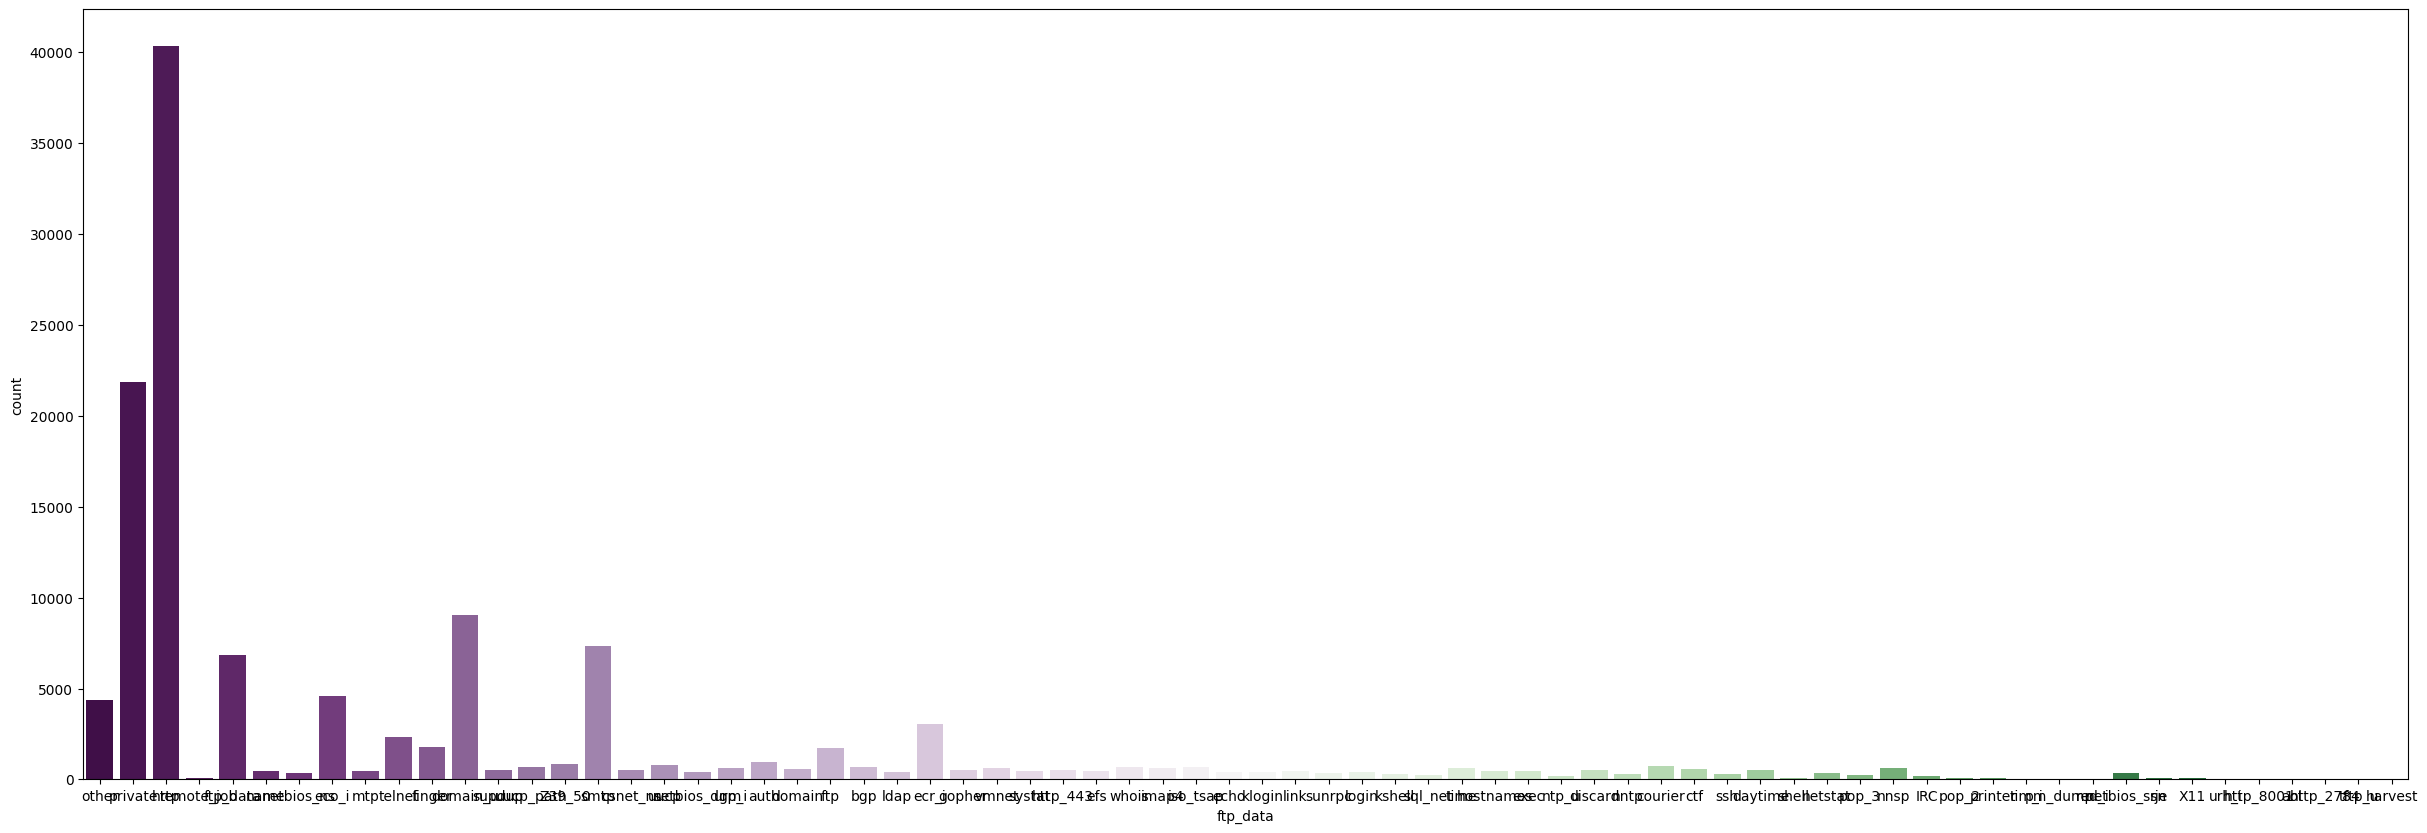

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(data=data_train, x='ftp_data', palette='PRGn')

In [ ]:
# plt.figure(figsize=(40,30))
# sns.heatmap(data_train.corr(), annot=True)

In [ ]:
data_types = data_train.dtypes

In [ ]:
print(data_types)

0             int64
tcp          object
ftp_data     object
SF           object
491           int64
0.1           int64
0.2           int64
0.3           int64
0.4           int64
0.5           int64
0.6           int64
0.7           int64
0.8           int64
0.9           int64
0.10          int64
0.11          int64
0.12          int64
0.13          int64
0.14          int64
0.15          int64
0.16          int64
0.18          int64
2             int64
2.1           int64
0.00        float64
0.00.1      float64
0.00.2      float64
0.00.3      float64
1.00        float64
0.00.4      float64
0.00.5      float64
150           int64
25            int64
0.17        float64
0.03        float64
0.17.1      float64
0.00.6      float64
0.00.7      float64
0.00.8      float64
0.05        float64
0.00.9      float64
normal       object
20            int64
dtype: object


In [ ]:
print(data_train['tcp'].unique())

['udp' 'tcp' 'icmp']


In [ ]:
import pandas as pd

# Example DataFrame with the 'proto' column
data = {
    'tcp ': [
        'udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip', 'ipnip',
        'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup', 'xnet', 'mux', 'dcn',
        'hmp', 'prm', 'trunk-1', 'trunk-2', 'xns-idp', 'leaf-1', 'leaf-2', 'irtp',
        'rdp', 'netblt', 'mfe-nsp', 'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp',
        'tp++', 'ipv6', 'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp',
        'rvd', 'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
        'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn', 'pvp',
        'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines', 'nsfnet-igp',
        'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip',
        'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp', 'ifmp', 'pnni', 'qnx',
        'scps', 'cbt', 'bbn-rcc', 'igp', 'bna', 'swipe', 'visa', 'ipcv', 'cphb',
        'iso-tp4', 'wb-expak', 'sep', 'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas',
        'fc', 'iso-ip', 'etherip', 'pim', 'aris', 'a/n', 'ipcomp', 'snp',
        'compaq-peer', 'ipx-n-ip', 'pgm', 'vrrp', 'l2tp', 'zero', 'ddx', 'iatp',
        'stp', 'srp', 'uti', 'sm', 'smp', 'isis', 'ptp', 'fire', 'crtp', 'crudp',
        'sccopmce', 'iplt', 'pipe', 'sps', 'ib'
    ]
}

akash = pd.DataFrame(data)

# Convert the 'proto' column to integer
akash['tcp _num'] = pd.factorize(akash['tcp '])[0]

# Display the modified DataFrame
print(akash)


         tcp   tcp _num
0         udp         0
1         arp         1
2         tcp         2
3        igmp         3
4        ospf         4
..        ...       ...
126  sccopmce       126
127      iplt       127
128      pipe       128
129       sps       129
130        ib       130

[131 rows x 2 columns]


In [ ]:
def encoding(df):
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            continue
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

In [ ]:
encoding(data_train)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,9,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,9,20
125968,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,11,21
125969,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,11,18
125970,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,20


In [ ]:
data_train.head(2)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,2,44,9,146,0,0,0,0,0,...,0.0,0.60,0.88,0.0,0.0,0.0,0.0,0.0,11,15
1,0,1,49,5,0,0,0,0,0,0,...,0.1,0.05,0.00,0.0,1.0,1.0,0.0,0.0,9,19


In [ ]:
print(data_train.columns)


Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03',
       '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')


In [ ]:
print(data_train.head)

<bound method NDFrame.head of         0  tcp  ftp_data  SF   491   0.1  0.2  0.3  0.4  0.5  ...  0.17  0.03  \
0       0    2        44   9   146     0    0    0    0    0  ...  0.00  0.60   
1       0    1        49   5     0     0    0    0    0    0  ...  0.10  0.05   
2       0    1        24   9   232  8153    0    0    0    0  ...  1.00  0.00   
3       0    1        24   9   199   420    0    0    0    0  ...  1.00  0.00   
4       0    1        49   1     0     0    0    0    0    0  ...  0.07  0.07   
...    ..  ...       ...  ..   ...   ...  ...  ...  ...  ...  ...   ...   ...   
125967  0    1        49   5     0     0    0    0    0    0  ...  0.10  0.06   
125968  8    2        49   9   105   145    0    0    0    0  ...  0.96  0.01   
125969  0    1        54   9  2231   384    0    0    0    0  ...  0.12  0.06   
125970  0    1        30   5     0     0    0    0    0    0  ...  0.03  0.05   
125971  0    1        20   9   151     0    0    0    0    0  ...  0.30  0.03  

In [ ]:
data_train['tcp']

,tcp
0,2
1,1
2,1
3,1
4,1
...,...
125967,1
125968,2
125969,1
125970,1


# column extract

In [ ]:
data_preprocess(data_train)

,column,dtype,nunique,null,dup
0,0,int64,2981,0,122991
1,tcp,int64,3,0,125969
2,ftp_data,int64,70,0,125902
3,SF,int64,11,0,125961
4,491,int64,3341,0,122631
5,0.1,int64,9326,0,116646
6,0.2,int64,2,0,125970
7,0.3,int64,3,0,125969
8,0.4,int64,4,0,125968
9,0.5,int64,28,0,125944


In [ ]:
# Clean up the column names to avoid errors
data_train.columns = data_train.columns.str.strip()

# Select the correct column names for features (X) and target (y)
x_train = data_train[['0', 'tcp', 'ftp_data', 'SF', '0.1', '1.00', '0.00.6', 'normal']]
y_train = data_train['20']  # Assuming '20' corresponds to 'level'


In [ ]:
x_train

,0,tcp,ftp_data,SF,0.1,1.00,0.00.6,normal
0,0,2,44,9,0,0.08,0.00,11
1,0,1,49,5,0,0.05,0.00,9
2,0,1,24,9,8153,1.00,0.04,11
3,0,1,24,9,420,1.00,0.00,11
4,0,1,49,1,0,0.16,0.00,9
...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0.14,0.00,9
125968,8,2,49,9,145,1.00,0.00,11
125969,0,1,54,9,384,1.00,0.00,11
125970,0,1,30,5,0,0.06,0.00,9


In [ ]:
y_train

,20
0,15
1,19
2,21
3,21
4,21
...,...
125967,20
125968,21
125969,18
125970,20


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# check if the expected column exists
if 'ftp_data' in x_train.columns:
    # Select relevant columns
    x_train = x_train[['0', 'tcp', 'ftp_data', 'SF', '0.1', '1.00', '0.00.6', 'normal']]  # Modify this list as needed

    # Normalize the selected columns
    scaler = MinMaxScaler()
    normalized_data = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

    # Print the normalized data columns
    print("Normalized DataFrame columns:", normalized_data.columns)
else:
    print("Column 'ftp_data' does not exist in data_train.")


Normalized DataFrame columns: Index(['0', 'tcp', 'ftp_data', 'SF', '0.1', '1.00', '0.00.6', 'normal'], dtype='object')


In [ ]:
x_train

,0,tcp,ftp_data,SF,0.1,1.00,0.00.6,normal
0,0,2,44,9,0,0.08,0.00,11
1,0,1,49,5,0,0.05,0.00,9
2,0,1,24,9,8153,1.00,0.04,11
3,0,1,24,9,420,1.00,0.00,11
4,0,1,49,1,0,0.16,0.00,9
...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0.14,0.00,9
125968,8,2,49,9,145,1.00,0.00,11
125969,0,1,54,9,384,1.00,0.00,11
125970,0,1,30,5,0,0.06,0.00,9


# **feature Selection**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [ ]:
X= data_train.drop(['tcp','normal'],axis=1)
y=data_train['normal']

In [ ]:
print(y.isnull().sum())


0


In [ ]:
# Drop the row with NaN in 'label'
data_train = data_train.dropna(subset=['normal'])

# Update y and X after dropping the row
y = data_train['normal']
X = data_train.drop(['tcp', 'normal'], axis=1)


In [ ]:
print(y.isnull().sum())  # This should now return 0
print(X.isnull().sum().sum())  # Check if there are any NaNs in X


0
0


In [ ]:
mutual_info = mutual_info_classif(X, y)


In [ ]:
mutual_info

array([0.07437768, 0.76311963, 0.67744196, 0.93064413, 0.50059398,
       0.00171384, 0.05423687, 0.        , 0.06108292, 0.00495992,
       0.35803105, 0.0397938 , 0.00144168, 0.        , 0.00383931,
       0.        , 0.0015889 , 0.00475284, 0.00138154, 0.00123022,
       0.01210999, 0.56216469, 0.2956077 , 0.47494974, 0.42446196,
       0.15031195, 0.10407207, 0.62241182, 0.65696292, 0.18638702,
       0.29396372, 0.54287114, 0.56329994, 0.61380294, 0.38565909,
       0.32894713, 0.49977223, 0.4479639 , 0.20274656, 0.15717872,
       0.36535286])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

,0
491,0.930644
ftp_data,0.763120
SF,0.677442
0.00.4,0.656963
1.00,0.622412
0.03,0.613803
0.17,0.563300
2,0.562165
25,0.542871
0.1,0.500594


<Axes: >

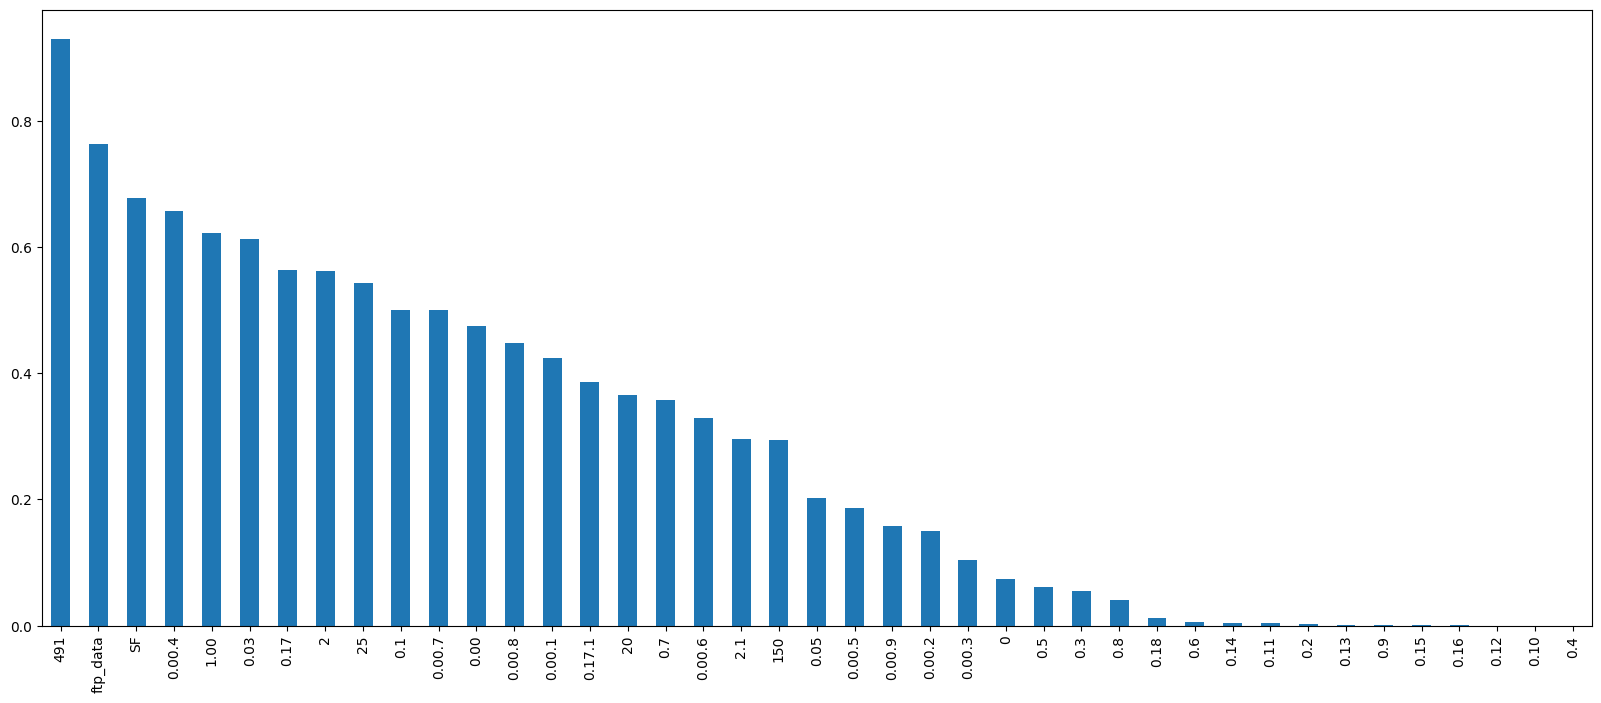

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10 ,autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

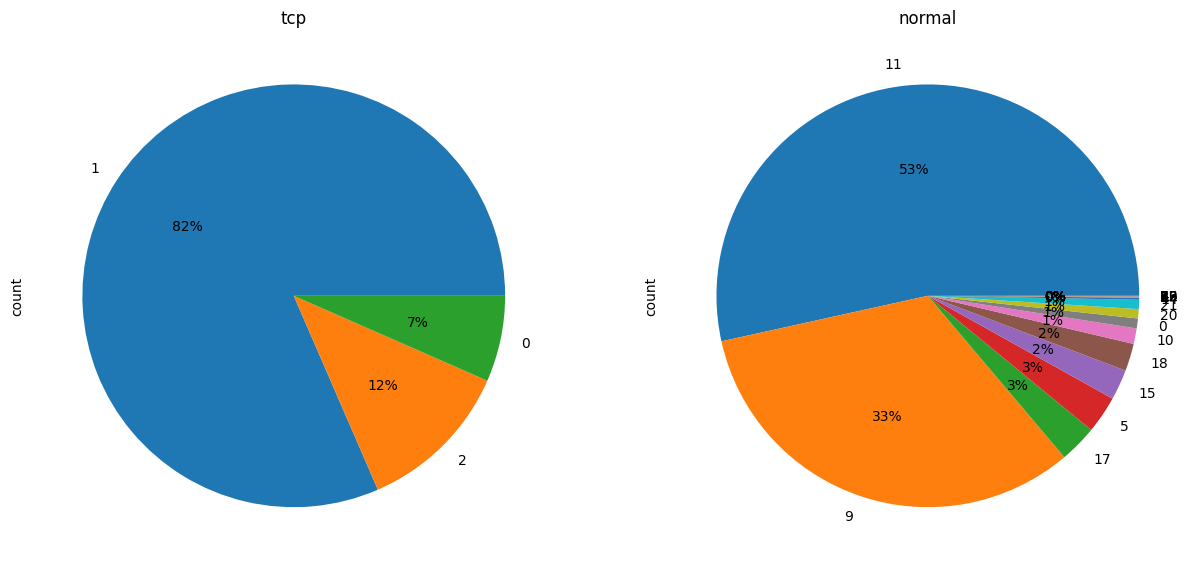

In [ ]:
import matplotlib.pyplot as plt
pie_plot(data_train, ['tcp', 'normal'], 1, 2)

In [ ]:
select_best_cols = SelectKBest(mutual_info_classif, k=25)
select_best_cols.fit(X, y)
select_features = X.columns[select_best_cols.get_support()]

In [ ]:
X =X[select_features]

In [ ]:
# Check for NaN values in X
print(X.isnull().sum())


ftp_data    0
SF          0
491         0
0.1         0
0.7         0
2           0
2.1         0
0.00        0
0.00.1      0
0.00.2      0
0.00.3      0
1.00        0
0.00.4      0
0.00.5      0
150         0
25          0
0.17        0
0.03        0
0.17.1      0
0.00.6      0
0.00.7      0
0.00.8      0
0.05        0
0.00.9      0
20          0
dtype: int64


# **Split and Scale data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
sc = StandardScaler()


In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **MODel BUilding**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def classalgo_test(x_train, x_test, y_train, y_test):
    # Instantiate classifiers
    classifiers = {
        'GaussianNB': GaussianNB(),
        'BernoulliNB': BernoulliNB(),
        # 'KNeighborsClassifier': KNeighborsClassifier(),
        'LogisticRegression': LogisticRegression(max_iter=1000),  # Ensure convergence
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        # 'RandomForestClassifier': RandomForestClassifier(),
        # 'GradientBoostingClassifier': GradientBoostingClassifier(),
        'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),  # Avoid warnings
        'BaggingClassifier': BaggingClassifier(),
        # 'AdaBoostClassifier': AdaBoostClassifier()
    }

    result = pd.DataFrame(columns=['Train_Accuracy', 'Train_Precision', 'Train_F1', 'Train_Recall',
                                   'Test_Accuracy', 'Test_Precision', 'Test_F1', 'Test_Recall', 'Test_AUC'])

    for name, algo in classifiers.items():
        algo.fit(x_train, y_train)

        # Predictions
        y_train_pred = algo.predict(x_train)
        y_test_pred = algo.predict(x_test)

        # Collect metrics
        result.loc[name] = [
            accuracy_score(y_train, y_train_pred),
            precision_score(y_train, y_train_pred, average='macro'),
            f1_score(y_train, y_train_pred, average='macro'),
            recall_score(y_train, y_train_pred, average='macro'),
            accuracy_score(y_test, y_test_pred),
            precision_score(y_test, y_test_pred, average='macro'),
            f1_score(y_test, y_test_pred, average='macro'),
            recall_score(y_test, y_test_pred, average='macro'),
            roc_auc_score(y_test, algo.predict_proba(x_test), multi_class='ovr')  # Adjust for multiclass AUC
        ]

    return result.sort_values('Test_Accuracy', ascending=False)

# Example of how to call the function:
# results = classalgo_test(X_train, X_test, y_train, y_test)
# print(results)


In [ ]:
classalgo_test(X_train, X_test, y_train, y_test)


,Train_Accuracy,Train_Precision,Train_F1,Train_Recall,Test_Accuracy,Test_Precision,Test_F1,Test_Recall,Test_AUC
XGBClassifier,0.999966,0.999900,0.999910,0.999920,0.998942,0.787821,0.780053,0.786961,0.999678
BaggingClassifier,0.999807,0.999720,0.999542,0.999364,0.997751,0.845307,0.793607,0.767206,0.912988
DecisionTreeClassifier,0.999966,0.999948,0.999922,0.999896,0.997460,0.746652,0.721825,0.753025,0.876440
LogisticRegression,0.986017,0.638246,0.592526,0.572242,0.985261,0.621326,0.603365,0.596761,0.996377
BernoulliNB,0.850284,0.343176,0.359690,0.497467,0.848037,0.345050,0.368092,0.519993,0.981856
GaussianNB,0.737582,0.439122,0.432610,0.763343,0.739125,0.349872,0.335418,0.565332,0.897734


**Random classifer**

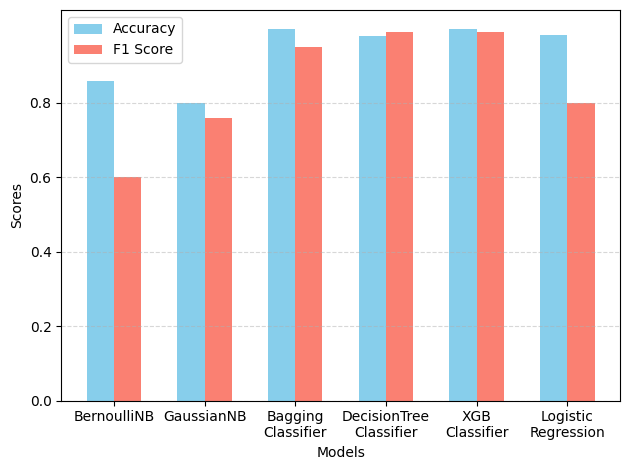

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["BernoulliNB", "GaussianNB", "Bagging\nClassifier", "DecisionTree\nClassifier","XGB\nClassifier" ,"Logistic\nRegression"]
accuracy = [0.859963, 0.799963, 0.999779, 0.98, 1.000000, 0.981530]
f1_score = [0.60, 0.76, 0.95, 0.99, 0.99, 0.80]


# Create a bar chart
plt.bar(np.arange(len(models)), accuracy, color="#87CEEB", label="Accuracy", width=0.3)
plt.bar(np.arange(len(models)) + 0.3, f1_score, color="#FA8072", label="F1 Score", width=0.3)

# Customize the chart
plt.xlabel("Models")
plt.ylabel("Scores")
# plt.title("Model Performance ")
plt.xticks(np.arange(len(models)) + 0.15, models)
plt.yticks(np.arange(0, 1, 0.2))
plt.grid(linestyle="--", axis="y", alpha=0.5)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

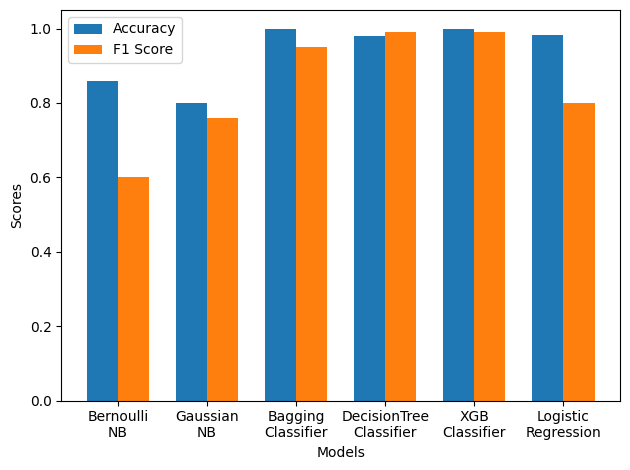

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data with model names split by line for clarity
models = ['Bernoulli\nNB', 'Gaussian\nNB', 'Bagging\nClassifier', 'DecisionTree\nClassifier', 'XGB\nClassifier', 'Logistic\nRegression']
accuracy = [0.859963, 0.799963, 0.999779, 0.98, 1, 0.98153]
f1_score = [0.6, 0.76, 0.95, 0.99, 0.99, 0.8]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
bars2 = ax.bar(x + width/2, f1_score, width, label='F1 Score')

# Labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
# ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.xticks(rotation=0)  # Set rotation to 0 as names are now stacked
plt.tight_layout()
plt.show()


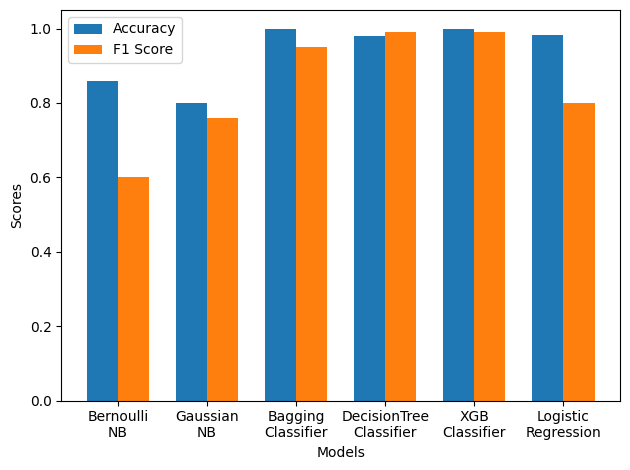

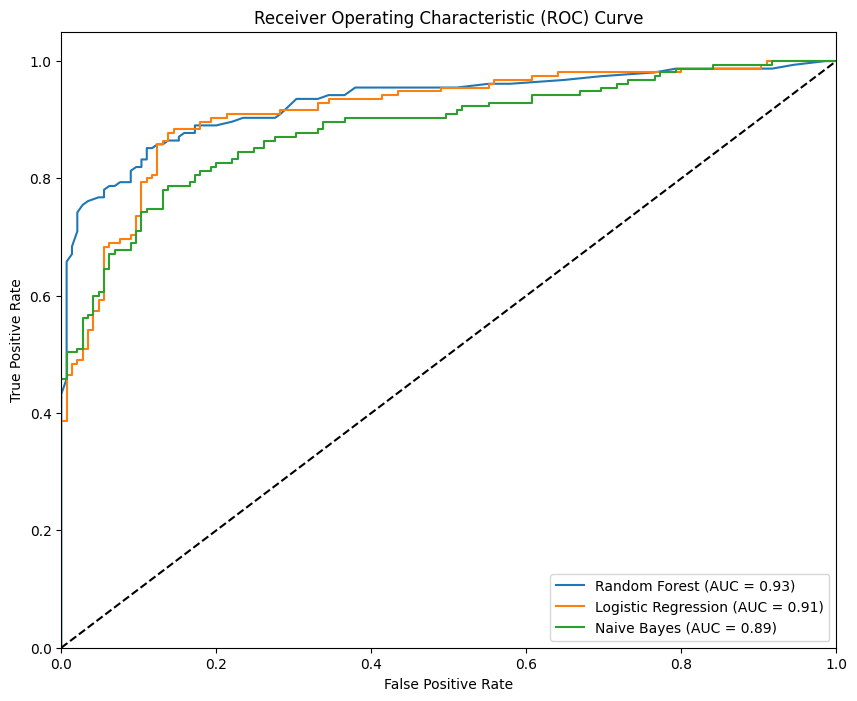

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

# Bar Plot Code
# Example data with model names split by line for clarity
models = ['Bernoulli\nNB', 'Gaussian\nNB', 'Bagging\nClassifier', 'DecisionTree\nClassifier', 'XGB\nClassifier', 'Logistic\nRegression']
accuracy = [0.859963, 0.799963, 0.999779, 0.98, 1, 0.98153]
f1_score = [0.6, 0.76, 0.95, 0.99, 0.99, 0.8]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
bars2 = ax.bar(x + width/2, f1_score, width, label='F1 Score')

# Labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the bar plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ROC Curve Code
# Sample data for ROC curve
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classifiers for ROC curve
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
}

plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict probabilities
    y_prob = clf.predict_proba(X_test)[:, 1]
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings for ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


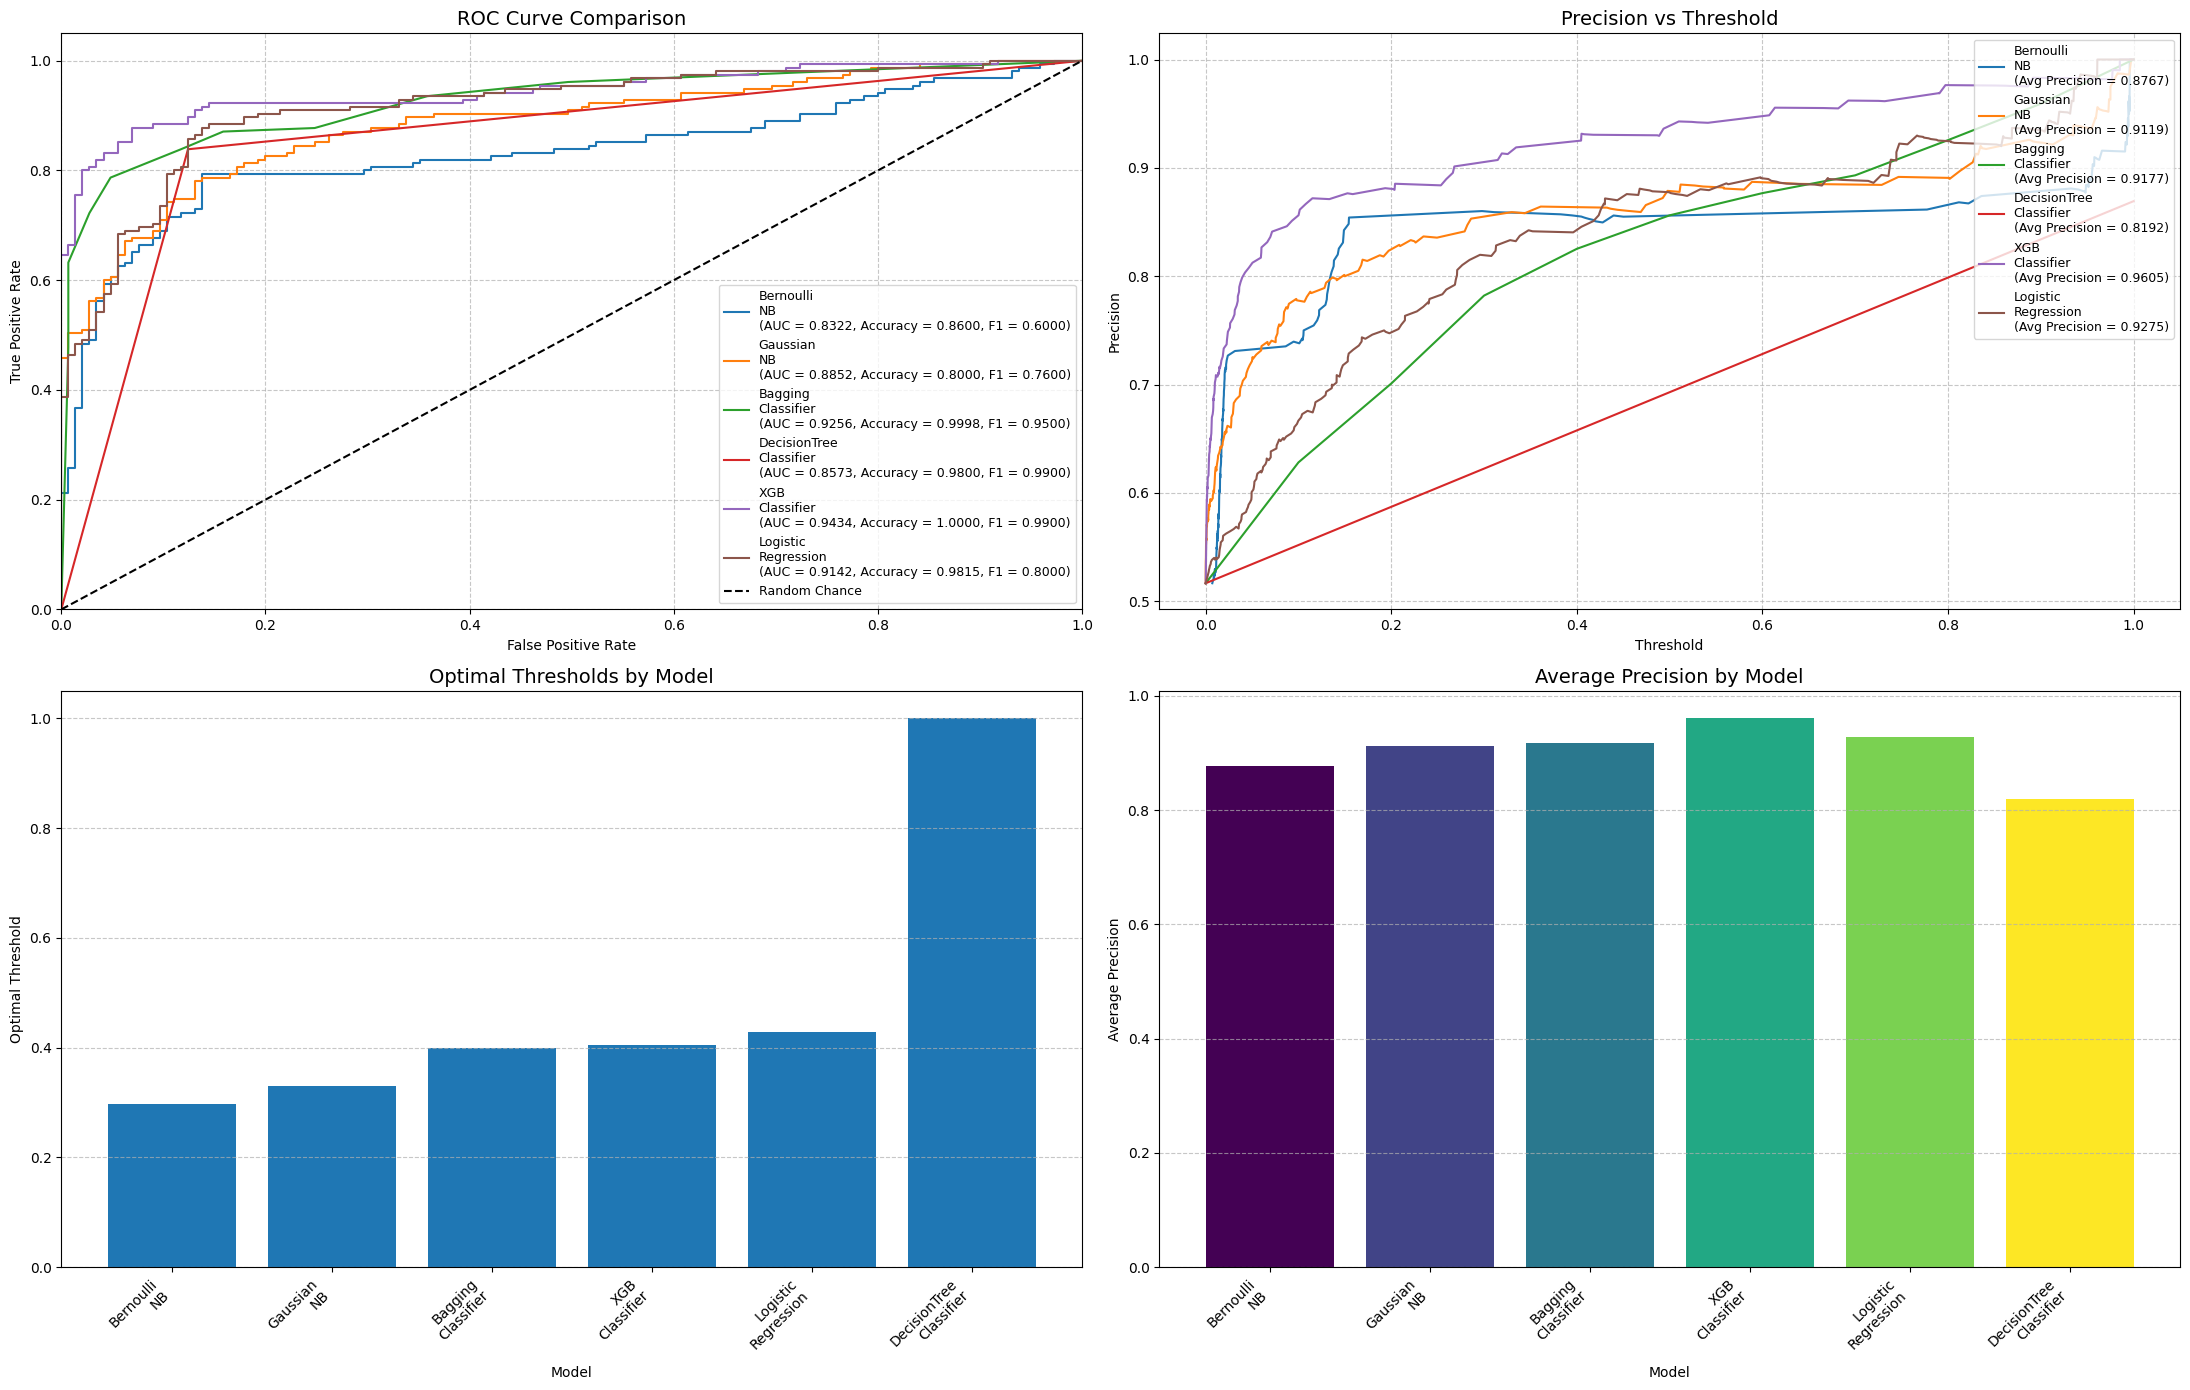


Threshold and Performance Details:
Bernoulli
NB:
  Optimal Threshold: 0.2978
  Average Precision: 0.8767
Gaussian
NB:
  Optimal Threshold: 0.3297
  Average Precision: 0.9119
Bagging
Classifier:
  Optimal Threshold: 0.4000
  Average Precision: 0.9177
XGB
Classifier:
  Optimal Threshold: 0.4050
  Average Precision: 0.9605
Logistic
Regression:
  Optimal Threshold: 0.4292
  Average Precision: 0.9275
DecisionTree
Classifier:
  Optimal Threshold: 1.0000
  Average Precision: 0.8192


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Updated model names
model_names = ['Bernoulli\nNB', 'Gaussian\nNB', 'Bagging\nClassifier', 'DecisionTree\nClassifier', 'XGB\nClassifier', 'Logistic\nRegression']

# Classifiers with predefined models
classifiers = {
    model_names[0]: BernoulliNB(),
    model_names[1]: GaussianNB(),
    model_names[2]: BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10),
    model_names[3]: DecisionTreeClassifier(),
    model_names[4]: XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    model_names[5]: LogisticRegression(max_iter=200)
}

# Updated accuracy and F1 scores
accuracy_scores = [0.859963, 0.799963, 0.999779, 0.98, 1, 0.98153]
f1_scores = [0.6, 0.76, 0.95, 0.99, 0.99, 0.8]

# Create a figure with subplots
plt.figure(figsize=(22, 14))

# ROC Curve Subplot
plt.subplot(2, 2, 1)
for (name, clf), accuracy, f1_score in zip(classifiers.items(), accuracy_scores, f1_scores):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict probabilities
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name}\n(AUC = {roc_auc:.4f}, Accuracy = {accuracy:.4f}, F1 = {f1_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison', fontsize=14)
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, linestyle='--', alpha=0.7)

# Thresholds Comparison Subplot
plt.subplot(2, 2, 2)
threshold_data = []

for (name, clf), accuracy, f1_score in zip(classifiers.items(), accuracy_scores, f1_scores):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict probabilities
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Compute precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)

    # Find optimal threshold
    f1_scores_thresholds = 2 * (precision * recall) / (precision + recall)
    optimal_idx = np.argmax(f1_scores_thresholds[:-1])
    optimal_threshold = thresholds[optimal_idx]

    threshold_data.append({
        'name': name,
        'optimal_threshold': optimal_threshold,
        'avg_precision': avg_precision
    })

    plt.plot(thresholds, precision[:-1], label=f'{name}\n(Avg Precision = {avg_precision:.4f})')

plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs Threshold', fontsize=14)
plt.legend(loc="upper right", fontsize=9)
plt.grid(True, linestyle='--', alpha=0.7)

# Threshold Details Subplot
plt.subplot(2, 2, 3)
threshold_details = sorted(threshold_data, key=lambda x: x['optimal_threshold'])
names = [td['name'] for td in threshold_details]
optimal_thresholds = [td['optimal_threshold'] for td in threshold_details]

plt.bar(names, optimal_thresholds)
plt.title('Optimal Thresholds by Model', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Optimal Threshold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Performance Metrics Subplot
plt.subplot(2, 2, 4)
avg_precisions = [td['avg_precision'] for td in threshold_details]

# Color the bars based on performance
colors = plt.cm.viridis(np.linspace(0, 1, len(avg_precisions)))
plt.bar(names, avg_precisions, color=colors)
plt.title('Average Precision by Model', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Average Precision')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print detailed threshold and performance information
print("\nThreshold and Performance Details:")
for td in threshold_details:
    print(f"{td['name']}:")
    print(f"  Optimal Threshold: {td['optimal_threshold']:.4f}")
    print(f"  Average Precision: {td['avg_precision']:.4f}")

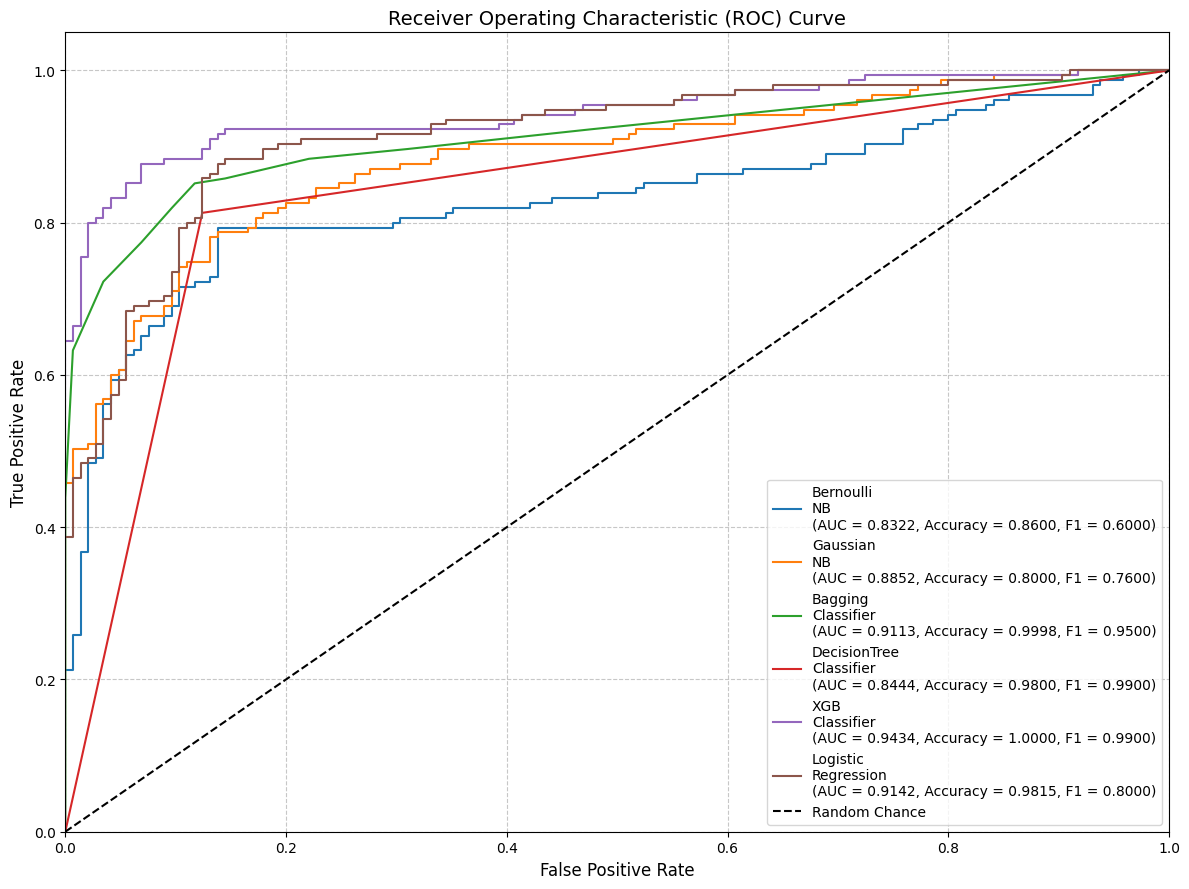

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Updated model names
model_names = ['Bernoulli\nNB', 'Gaussian\nNB', 'Bagging\nClassifier', 'DecisionTree\nClassifier', 'XGB\nClassifier', 'Logistic\nRegression']

# Classifiers with predefined models
classifiers = {
    model_names[0]: BernoulliNB(),
    model_names[1]: GaussianNB(),
    model_names[2]: BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10),
    model_names[3]: DecisionTreeClassifier(),
    model_names[4]: XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    model_names[5]: LogisticRegression(max_iter=200)
}

# Updated accuracy and F1 scores
accuracy_scores = [0.859963, 0.799963, 0.999779, 0.98, 1, 0.98153]
f1_scores = [0.6, 0.76, 0.95, 0.99, 0.99, 0.8]

# Create the plot
plt.figure(figsize=(12, 9))

# Iterate through classifiers
for (name, clf), accuracy, f1_score in zip(classifiers.items(), accuracy_scores, f1_scores):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict probabilities
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve with additional performance metrics
    plt.plot(fpr, tpr, label=f'{name}\n(AUC = {roc_auc:.4f}, Accuracy = {accuracy:.4f}, F1 = {f1_score:.4f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
rf= RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

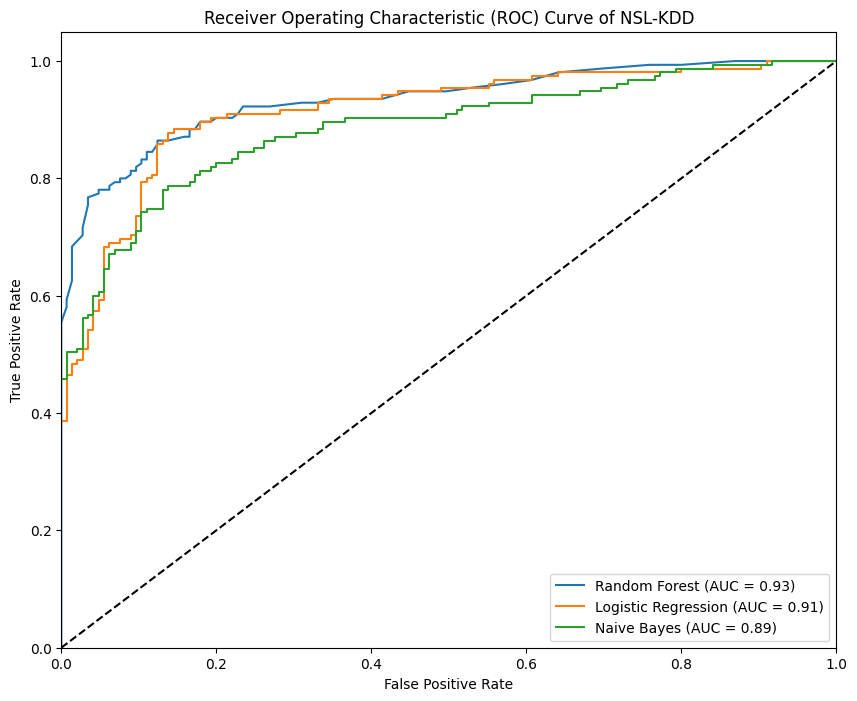

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

# Sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
}

plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict probabilities
    y_prob = clf.predict_proba(X_test)[:, 1]
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of NSL-KDD')
plt.legend(loc="lower right")
plt.show()


In [ ]:
rf_predict=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       145
           1       0.90      0.84      0.87       155

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [ ]:
print(confusion_matrix(y_test,rf_predict))

[[130  15]
 [ 25 130]]


#with optimization